# 1. DFS , BFS

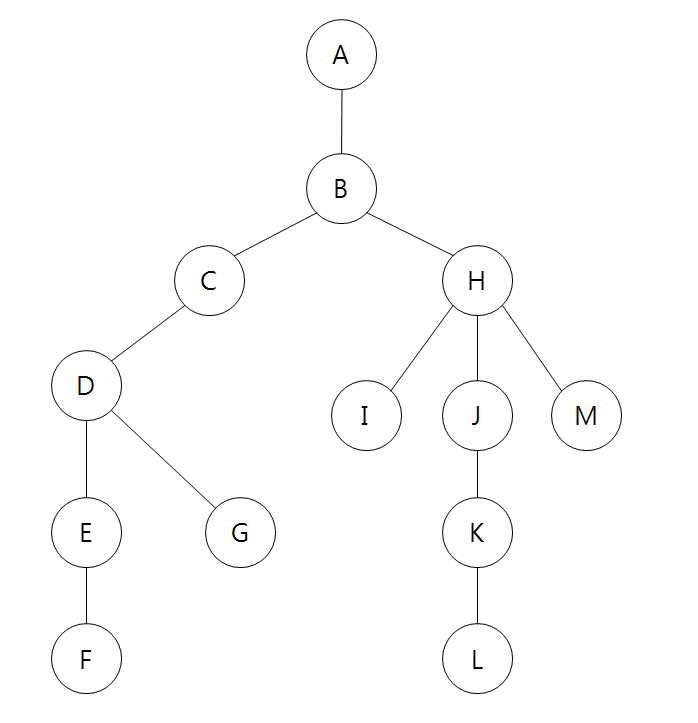

In [20]:
graph = {
    'A': ['B'],
    'B': ['A', 'C', 'H'],
    'C': ['B', 'D'],
    'D': ['C', 'E', 'G'],
    'E': ['D', 'F'],
    'F': ['E'],
    'G': ['D'],
    'H': ['B', 'I', 'J', 'M'],
    'I': ['H'],
    'J': ['H', 'K'],
    'K': ['J', 'L'],
    'L': ['K'],
    'M': ['H']
}

## 깊이 우선 탐색 (DFS) 구현하기
- 트리에서 노드의 가장 깊은곳 까지 탐색하고 다른 노드로 이동해서 탐색을 반복

In [10]:
from collections import deque

In [32]:
# 재귀함수로 구현
def dfs(graph, start_node, visited=None) :
    if visited is None :
        visited = set()
    visited.add(start_node)
    
    for next in set(graph[start_node]) - visited :
        dfs(graph, next, visited)
    return visited

dfs(graph, 'A')

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M'}

In [47]:
def dfs(graph, v, visited) :
    # 현재 노드 방문 처리
    visited[v] = True
    print(v, end=' ')
    # 현재 노드와 연결된 다른 노드를 재귀적으로 방ㅁ누
    for i in graph[v] :
        if not visited[i] :
            dfs(graph, i, visited)
            
 # 각 노드가 연결된 정보를 리스트 자료형으로 표현
graph = [
        [],
    [2, 3, 8],
    [1, 7],
    [1, 4, 5],
    [3, 5],
    [3, 4],
    [7],
    [2, 6, 8],
    [1, 7]
]

# 각 노드가 방문된 정보를 리스트 자료형으로 표현
visited = [False] * 9

# 정의돈 dfs 함수호풀
dfs(graph, 1, visited)

1 2 7 6 8 3 4 5 

In [25]:
def dfs(graph, start_node) :
    visited = deque()
    need_visit = deque()
    
    need_visit.append(start_node)
    
    while need_visit : 
        node = need_visit.pop()
        if node not in visited :
            visited.append(node)
            if node in graph :
                need_visit.extend(graph[node])
                
    return visited


print(dfs(graph, 'A'))

deque(['A', 'B', 'H', 'M', 'J', 'K', 'L', 'I', 'C', 'D', 'G', 'E', 'F'])


## 너비 우선 탐색 (BFS) 구현하기
- 한 단계씩 나아가면서 해당 노드의 형제 노드로 이동해서 탐색을 반복

In [17]:
def bfs(graph, start_node) :
    visited = deque()
    need_visit = deque()
    
    need_visit.append(start_node)
    
    while need_visit : 
        node = need_visit.popleft()
        if node not in visited :
            visited.append(node)
            if node in graph :
                need_visit.extend(graph[node])
                
    return visited

print(bfs(graph, 'A'))

deque(['A', 'B', 'C', 'H', 'D', 'I', 'J', 'M', 'E', 'G', 'K', 'F', 'L'])


In [48]:
from collections import deque

def bfs(graph, start, visited) :
    queue = deque([start])
    # 현재 노드 방문 처리
    visited[start] = True
    # 큐가 빌때까지 반복
    while queue :
        # 큐에서 하나 원소를 뽑아 출력
        v = queue.popleft()
        print(v, end=' ')
        # 해당 원소와 연결된 아직 방문하지 않은 원소들을 큐에 삽입
        for i in graph[v] :
            if not visited[i] :
                queue.append(i)
                visited[i] = True
                
# 2차원 리스트
graph = [
        [],
    [2, 3, 8],
    [1, 7],
    [1, 4, 5],
    [3, 5],
    [3, 4],
    [7],
    [2, 6, 8],
    [1, 7]
]

visited = [False] * 9

bfs(graph, 1, visited)

1 2 3 8 7 4 5 6 

### 음료수 얼려 먹기

In [53]:
ice = [[0,0,1,1,0], [0,0,0,1,1],
      [1,1,1,1,1],[0,0,0,0,0]]
n = len(ice)
m = len(ice[0])



def dfs(x, y) :
    # 주어진 범위를 벗어나면 즉시 종료
    if x <= -1 or x >= n or y <= -1 or y >= m :
        return False
    
    # 현재 노드를 아직 방문하지 않았다면
    if ice[x][y] == 0 : 
        ice[x][y] = 1 # 방문 처리
        # 상하좌우 재귀호출
        dfs(x-1, y)
        dfs(x, y-1)
        dfs(x+1, y)
        dfs(x, y+1)
        return True
    
    return False

# 모든 노드에 대해 음료수 채우기
result = 0
for i in range(n) :
    for j in range(m) :
        # 현 위치에서 dfs 수행
        if dfs(i, j) == True  :
            result += 1
            
print(result)

3


### 미로 탈출

In [76]:
# 지나가면 2로 처리
maze = [[1,0,1,0,1,0],
       [1,1,1,1,1,1],
       [0,0,0,0,0,1],
       [1,1,1,1,1,1],
       [1,1,1,1,1,1]]

# maze = [[1,0,1,1,1],[1,0,1,0,1],[1,0,1,1,1],[1,1,1,0,1],[0,0,0,0,1]]

n, m = len(maze), len(maze[0])

from collections import deque

# 네방향 정의/ 상하좌우
dx = [-1, 1, 0, 0]
dy = [0, 0, -1, 1]

# BFS 소스코드 구현
def bfs(x, y) :
    queue = deque()
    queue.append((x, y))
    
    while queue : 
        x, y = queue.popleft()
        
        for i in range(4) :
            nx = x + dx[i]
            ny = y + dy[i]
            
            # 미로 찾기 공간 벗어나면 무시
            if nx < 0 or ny < 0 or nx >=n or ny >= m :
                continue
                
            # 벽이면 무시
            if maze[nx][ny] == 0 :
                continue
                
            # 노드를 처음 방문해야 최단거리
            if maze[nx][ny] == 1 :
                maze[nx][ny] = maze[x][y] + 1
                queue.append((nx, ny))
                
    # 가장 오른쪽 아래까지 최단거리 반환
    return maze[n-1][m-1]

bfs(0, 0)

10

# 2. 이진 탐색(Binary Search)

- 오름차순으로 정렬된 배열에서 원하는 숫자(target)를 찾는 알고리즘
1. 전체 배열 중간값을 target 값과 비교
2. 중간값이 target 값보다 크면 왼쪽 부분만 선택
3. 왼쪽 부분의 중간 값을 다시 target과 비교

In [6]:
target = 25

numbers = [2, 10 ,45, 66, 28, 25, 95, 16, 64, 31, 33, 22, 7]
length = len(numbers)

numbers = sorted(numbers)
left = 0
right = length - 1
cnt = 0

while left <= right :
    mid = (left + right) // 2
    if numbers[mid] == target :
        print(mid + 1)
        break
    elif numbers[mid] > target :
        right = mid - 1
    else :
        left = mid + 1
    print(mid, left, right)
    cnt += 1
    
print(f'검색한 횟수 : {cnt} result : {numbers[mid]}')

6 0 5
2 3 5
4 5 5
6
검색한 횟수 : 3 result : 25


# 3. 탐욕법(Greedy)

- 탐욕적(greedy)이라는 것은 `현 상황에서 지금 당장 좋은 것만 고르는 방법`을 의미한다.
- 그리디 알고리즘을 이용하면 매 순간 가장 좋아보이는 것을 선택하며, 현재 선택이 나중에 미칠
영향에 대해서는 고려하지 않는다.
- 기준에 따라 좋은 것을 선택하는 알고리즘이므로, 문제에서 '가장 큰 순서대로', '가장 작은 순서대로'
와 같은 기준을 제시한다. 따라서 그리디 알고리즘 문제는 정렬 알고리즘과 짝을 이뤄 출제되는 경우가 빈번하다.

### Greedy(2019 국가교육기관 코딩 테스트) - 큰 수의 법칙
- 배열의 크기 N, 숫자가 더해지는 횟수 M, K(k번을 초과할 수 없음)가 주어질 때 큰 수의 법칙에 따른 결과를 출력

### 해결 방법
- 특정 인덱스의 수가 연속해서 k번까지만 더해질 수 있으므로, 내림차순 정렬하여 
리스트의 0번째 인덱스 * k 를 결과값에 더하고 1번째 인덱스 를 더하는 과정을 반복
- m이 소진되면 루프를 중단하고 결과 리턴

In [1]:
def solution(n, m, k, arr) :
    arr = sorted(arr,reverse=True)
    res = 0
    while m > 0 :
        if k < m :
            res += arr[0] * k
            m -= k
        else :
            res += arr[0] * m
            break
        
        if m >= 1 :
            res += arr[1]
            m -= 1
            
    return res

n = 5 
m = 8 
k = 3
arr = [2, 4, 5, 4, 6]

solution(n, m, k, arr)

46

### Greedy(2019 국가교육기관 코딩 테스트) - 숫자 카드 게임
- 여러 개의 숫자 카드 중에서 가장 높은 숫자가 쓰인 카드 한 장을 뽑는 게임

### 해결 방법
- 각 행에서 가장 작은 수를 찾고, 작은 수중에 가장 큰 수를 리턴

In [2]:
# n * m 형태의 숫자 카드 배열 (n은 행, m은 열)
n = 3
m = 3
arr = [[3,1,2], [4,1,4], [2,2,2]] # 각 카드에 적힌 숫자

In [3]:
def solution(n, m, arr) :
    mins = 0
    for a in arr :
        if min(a) > mins :
            mins = min(a)
    return mins

n = 2
m = 4
arr = [[7,3,1,8], [3, 3, 3, 4]]
solution(n, m, arr)

3

### Greedy(2018 E 기업 알고리즘 대회) - 1이 될 때까지
- 어떠한 수 N이 1이 될 때까지 다음의 두 과정 중 하나를 반복적으로 선택하여 수행하려고 함.
- 단, 두번째 연산은 N이 K로 나누어 떨어질 때만 선택 가능
> 1. N에서 1을 뺀다
> 2. N를 K로 나눈다

In [9]:
def solution(n, k) :
    cnt = 0
    while n != 1  :
        if n%5 != 0 :
            n -= 1
        else :
            n /= k
        cnt += 1
        
    return cnt

N = 25
K = 5
solution(N, K)

2

# 4. 구현

### 1) 상하좌우 
- L, R, U, D
- N * N 크기의 정사각형

In [10]:
n = 5
plan = ['R', 'R', 'R', 'U', 'D', 'D']
# 시작 좌표는 항상 (1, 1)

In [14]:
def solution(n, plan) :
    start = [1, 1]
    for p in plan :
        if p == 'R' and start[1] != n :
            start[1] += 1
            
        elif p == 'L' and start[1] != 1 :
            start[1] -= 1
            
        elif p == 'U' and start[0] != 1 :
            start[0] -= 1
            
        elif p == 'D' and start[0] != n :
            start[0] += 1
            
    return start

solution(n, plan)

[3, 4]

### 2) 시각

In [27]:
# 정수 n 이 입력되면 00시 00분 00초부터 N시 59분 59초까지의 모든 시각 중에서
# 3이 하나라도 포함된 모든 경우의 수를 구하는 프로그램

n = 5

# 0시 ~ 5시 59분 59초 까지 모든 경우의 수 탐색

def solution(n) :
    count_3=0
    for hour in range(n+1) :
        for mins in range(60) :
            for secs in range(60) :
                if '3' in str(hour) or '3' in str(mins) or '3' in str(secs) :
                    count_3 += 1
                    
    return count_3

# count_3 = 0

# for hour in range(n+1) :
#     for mins in range(60) :
#         for secs in range(60) :
# #             print(hour, mins, secs)
#             if '3' in str(hour) or '3' in str(mins) or '3' in str(secs) :
#                 count_3 += 1
                
print(solution(n))

11475


### 3) 왕실의 나이트 

In [29]:
# 8*8 좌표 상에서 나이트가 현재 위치한 곳의 좌표를 문자로
# 첫째 줄에 나이트가 이동할 수 있는 경우의 수를 출력

start = (1, 1)

# 나이트의 이동 
# 1. 수평으로 두 칸 이동 후에 수직으로 한 칸
# 2. 수직으로 두 칸 이동 후에 수평으로 한 칸
# 상 , 하 , 좌, 우 경우의 수 를 생각

p = 0

# ------- 수직

if start[0] < 3  or start[0] > 6 : # 3 보다 작으면 아래로만 이동 가능, 6보다 크면 위로만
    if start[1] < 2 or start[1] > 7 :
        p += 1
        # 1 이면 오른쪽으로 만, 8이면 왼쪽으로만 이동 가능
    else :
        p += 2
        
else :
    if start[1] < 2 or start[1] > 7 :
        p += 2
        # 1 이면 오른쪽으로 만, 8이면 왼쪽으로만 이동 가능
    else :
        p += 4
      
    
# ------- 수평
    
if start[1] < 3  or start[1] > 6 : # 3 보다 작으면 아래로만 이동 가능, 6보다 크면 위로만
    if start[0] < 2 or start[0] > 7 :
        p += 1
        # 1 이면 오른쪽으로 만, 8이면 왼쪽으로만 이동 가능
    else :
        p += 2
        
else :
    if start[0] < 2 or start[0] > 7 :
        p += 2
        # 1 이면 오른쪽으로 만, 8이면 왼쪽으로만 이동 가능
    else :
        p += 4        
        
print(p)

2


In [31]:
def solution(start) :
    # 나이트가 이동할 수 있는 8가지 방향
    steps = [(-2, -1), (-1, -2), (1, -2), (2, -1), 
            (2, 1), (1, 2), (-1, 2), (-2, 1)]
    
    row = start[0]
    column = start[1]
    
    # 8방향에 대하여 각 위치로 이동 가능한지 확인
    result = 0
    for step in steps :
        # 이동하고자 하는 위치 확인
        next_row = row + step[0]
        next_column = column + step[1]
        
        # 해당 위치로 이동 가능하면 카운트 증가
        if next_row >=1 and next_row <= 8 and next_column >= 1 and next_column <= 8 :
            result += 1
            
    return result

solution(start)
        

2

### 4) 게임 개발

In [20]:
# n*m 크기 직사각형 (A, B) 
# A는 북쪽으로부터 떨어진 칸 개수, B는 서쪽으로부터 떨어진 칸 개수

# 1. 현 위치에서 현재 방향을 기준으로 왼쪽 방향 부터 차례대로 갈곳을 정한다
# 2. 캐릭터의 바로 왼쪽 방향에 가보지 않은 칸이 존재하면, 왼족 방향으로 회전한 다음 왼쪽으로 한 칸 전진.
# 왼쪽 방향에 가보지 않은 칸이 없다면, 왼쪽 방향으로 회전만 수행하고 1단계로 돌아감.
# 3. 만약 네 방향 모두 이미 가본 칸이나 바다로 된 칸인 경우에는, 바라보는 방향을 유지한 채로 한 칸 뒤로 가고
# 1단계로 돌아감. 단,, 이때는 뒤쪽 방향이 바다인 칸이라 뒤로 갈 수 없는 경우 움직임을 멈춤
# --> 메뉴얼에 따라 캐릭터를 이동시킨 뒤 캐릭터가 방문한 칸의 수를 출력하는 프로그램을 만드시오.

# 0 : 북, 1 : 동, 2 :남, 3 : 서

# 맵의 외곽은 항상 바다. 0 : 육지, 1 : 바다 
# 캐릭터가 처음에 위치한 칸은 항상 육지

In [46]:
def solution(n, m, start, maps, direction) :
    
    maps[start[0]][start[1]] = 1 # 현 좌표를 방문 처리
    
    # 북, 동, 남, 서 방향 정의
    dx = [-1, 0, 1, 0]
    dy = [0, 1, 0, -1]
    
    # 왼쪽으로 회전
    def turn_left() : 
        global direction
        direction -= 1
        
        if direction == -1 :
            direction = 3
            
    # 시뮬레이션 시작
    cnt = 1
    turn_time = 0
    while True :
        # 왼쪽으로 회전
        turn_left()
        print(start)
        nx = start[1] + dx[direction]
        ny = start[0] + dy[direction]

        # 회전한 이후 정면에 가보지 않은 칸이 존재하는 경우 이동
        if maps[nx][ny] == 0 and maps[nx][ny] == 0 :
            maps[nx][ny] = 1
            start = (nx, ny)
            cnt += 1
            turn_time = 0
            
            continue
            
        # 회전한 이후 정면에 가보지 않은 칸이 없거나 바다인 경우
        else :
            turn_time += 1
            
        # 네방향 모두 갈 수 없는 경우
        if turn_time == 4 :
            nx = start[1] - dx[direction]
            ny = start[0] - dy[direction]
            
            # 뒤로 갈 수 있다면 이동
            if maps[nx][ny] == 0 :
                x = nx
                y = ny
                
            # 뒤가 바다로 막힌 경우
            else :
                break
                
            turn_time = 0
            
            
    return cnt


maps = [[1, 1, 1, 1],
       [1, 0, 0, 1],
       [1, 1, 0, 1],
       [1, 1, 1, 1]]

direction = 1 # 0 : 북, 1 : 동, 2 :남, 3 : 서

n, m = 4, 4
start = (1, 1)
solution(n, m, start, maps, direction)

(1, 1)
(1, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)


3

---